In [20]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [21]:
file_path = r'/content/dataset.csv'

dataframe = pd.read_csv(file_path)
dataframe.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5,CG,veri nice set good qualiti we set two month


In [22]:
dataframe.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5,CG,veri nice set good qualiti we set two month


In [23]:
dataframe.dropna(inplace=True)

In [24]:
dataframe['length'] = dataframe['text_'].apply(len)

Let's extract the largest review...

In [25]:
dataframe[dataframe['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_ ##so here we are just collecting the words which are most common in the fake reviews so that we can identify these wrods to detect for future text

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [26]:
def convertmyTxt(rv):
    np = [c for c in rv if c not in string.punctuation]
    np = ''.join(np)
    return [w for w in np.split() if w.lower() not in stopwords.words('english')]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(dataframe['text_'],dataframe['label'],test_size=0.25)

In [28]:
pip = Pipeline([
    ('bow',CountVectorizer(analyzer=convertmyTxt)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [29]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [30]:
pip.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function convertmyTxt at 0x7bb1f059ee60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [31]:
randomForestClassifier = pip.predict(x_test)
confusion=confusion_matrix(y_test,randomForestClassifier)

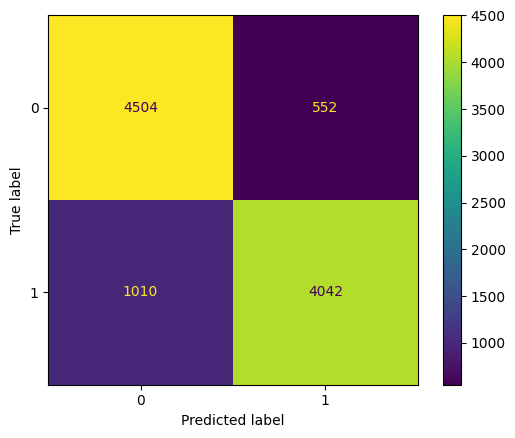

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = confusion
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

In [33]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,randomForestClassifier)*100,2)) + '%')

Accuracy of the model:  84.55%


In [34]:
pip = Pipeline([
    ('bow',CountVectorizer(analyzer=convertmyTxt)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [36]:
pip.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function convertmyTxt at 0x7bb1f059ee60>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [37]:
supportVectorClassifier = pip.predict(x_test)
confusion=confusion_matrix(y_test,supportVectorClassifier)


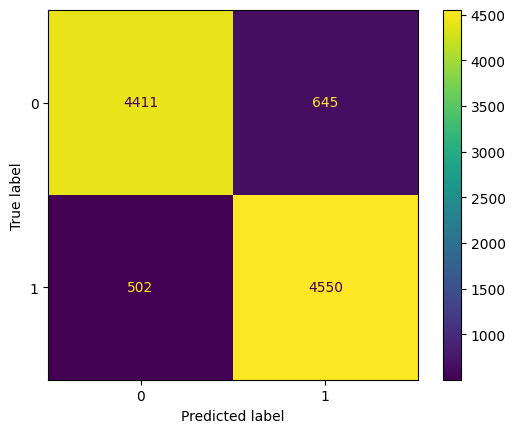

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = confusion
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

In [39]:
print('accuracy of the model:',str(np.round(accuracy_score(y_test,supportVectorClassifier)*100,2)) + '%')#here we are predicting the accuracy of the Random Forest Classifier model

accuracy of the model: 88.65%


In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


def text_process(text):
    words = word_tokenize(text)

    words = [word for word in words if word.lower(
    ) not in stopwords.words('english')]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


In [41]:
pip = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [42]:
pip.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bb1efe0e200>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [43]:
logisticRegression = pip.predict(x_test)
confusion=confusion_matrix(y_test,logisticRegression)

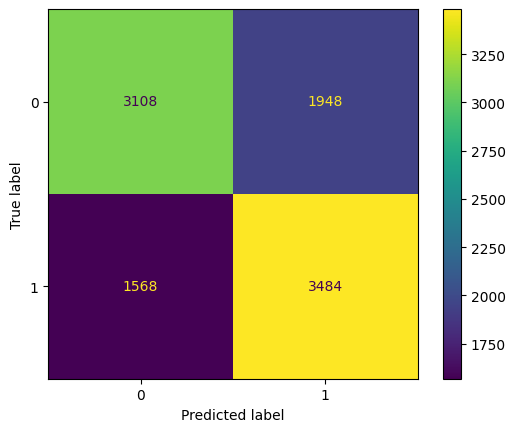

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = confusion
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

In [45]:
print('accuracy of the using logistic regression model:',str(np.round(accuracy_score(y_test,logisticRegression)*100,2)) + '%')

accuracy of the model: 65.22%
